In [216]:
from __future__ import print_function
import pyart
import xray
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from mpl_toolkits.basemap.pyproj import Proj
%matplotlib inline

In [222]:
my_data = xray.open_mfdataset('/data/modal/wrfout_d01_2004-12-16_*', concat_dim='Time')


In [195]:
dx = my_data.DX
dy = my_data.DY
lat_0 = 18.
lon_0 = 62.


In [223]:
print(my_data.data_vars['Times'])
for key in my_data.data_vars.keys():
    if 'Q' in key: 
        print(key)

<xarray.DataArray 'Times' (Time: 30)>
array(['2004-12-16_08:00:00', '2004-12-16_08:10:00', '2004-12-16_08:20:00',
       '2004-12-16_08:30:00', '2004-12-16_08:40:00', '2004-12-16_08:50:00',
       '2004-12-16_10:00:00', '2004-12-16_10:10:00', '2004-12-16_10:20:00',
       '2004-12-16_10:30:00', '2004-12-16_10:40:00', '2004-12-16_10:50:00',
       '2004-12-16_13:00:00', '2004-12-16_13:10:00', '2004-12-16_13:20:00',
       '2004-12-16_13:30:00', '2004-12-16_13:40:00', '2004-12-16_13:50:00',
       '2004-12-16_14:00:00', '2004-12-16_14:10:00', '2004-12-16_14:20:00',
       '2004-12-16_14:30:00', '2004-12-16_14:40:00', '2004-12-16_14:50:00',
       '2004-12-16_15:00:00', '2004-12-16_15:10:00', '2004-12-16_15:20:00',
       '2004-12-16_15:30:00', '2004-12-16_15:40:00', '2004-12-16_15:50:00'], 
      dtype='|S19')
Coordinates:
  * Time     (Time) int64 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 ...
QVAPOR
QCLOUD
QSNOW
QHAIL
QNSNOW
QVGRAUPEL
QNRAIN
QNCLOUD
QRAIN
QNICE
QFX
QNCCN
QNGRAUP

In [224]:
cloud_mixing_ratio = my_data.data_vars['QCLOUD']
cloud_ndensity = my_data.QNCLOUD
shp = cloud_mixing_ratio.shape
time = my_data.data_vars['Times']
lats = my_data.XLAT
lons = my_data.XLONG
refl = my_data.REFL_10CM
levels = np.array([my_data.P_HYD.data[0, z, :, :].mean()/100.0 \
                   for z in range(my_data.P_HYD.data.shape[1])])
y_array = np.linspace(0, (shp[2]-1)*dx,shp[2])
x_array = np.linspace(0, (shp[3]-1)*dx,shp[3])
print(refl.units)


dBZ


0.000929536 0.0


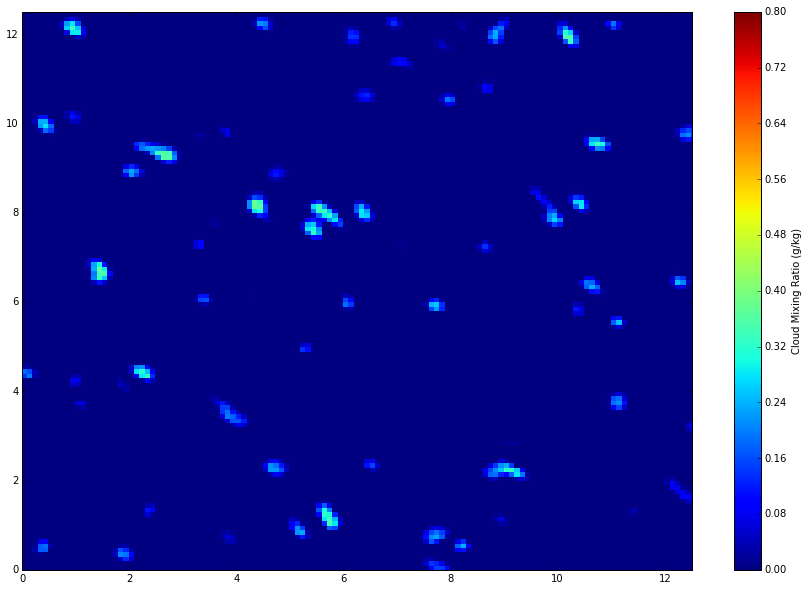

In [226]:
fig = plt.figure(figsize = [15,10])
print(cloud_mixing_ratio.data.max(), cloud_mixing_ratio.data.min())
plt.pcolormesh(x_array/1000.0, y_array/1000.0, 
               cloud_mixing_ratio.data[5, 20, :,:]*1000.0, vmax = 0.8)
cb = plt.colorbar()
plt.ylim([0, 12.5])
plt.xlim([0, 12.5])
cb.set_label('Cloud Mixing Ratio (g/kg)')


0.00085808 0.0


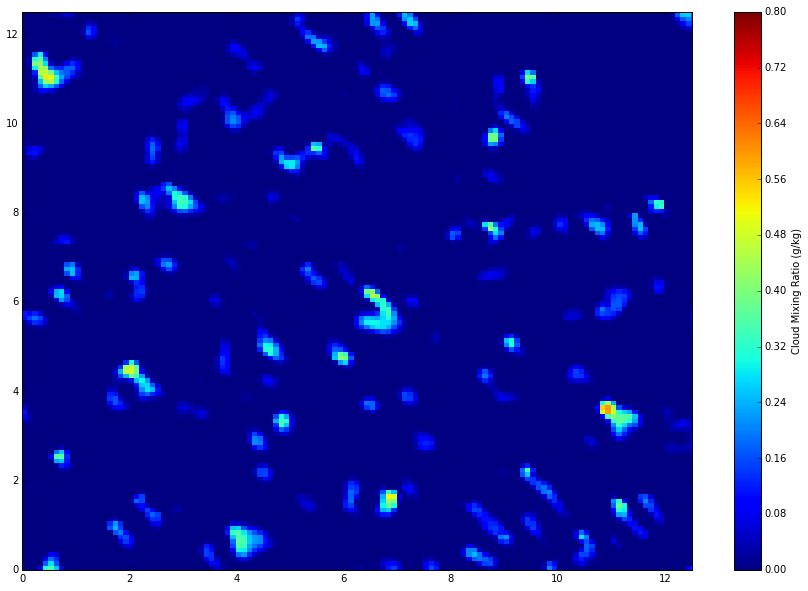

In [209]:
fig = plt.figure(figsize = [15,10])
print(cloud_mixing_ratio.data.max(), cloud_mixing_ratio.data.min())
plt.pcolormesh(x_array/1000.0, y_array/1000.0, 
               cloud_mixing_ratio.data[5, :, :,:].max(axis=0)*1000.0, vmax = 0.8)
cb = plt.colorbar()
plt.ylim([0, 12.5])
plt.xlim([0, 12.5])
cb.set_label('Max Cloud Mixing Ratio in column (g/kg)')


In [236]:
cth =levels[cloud_mixing_ratio.data[5, :, :,:].argmax(axis=0)]
print(cth.shape)
#np.choose(cloud_mixing_ratio.data[5, :, :,:].argmax(axis=0), levels)

(128, 128)


0.000929536 0.0


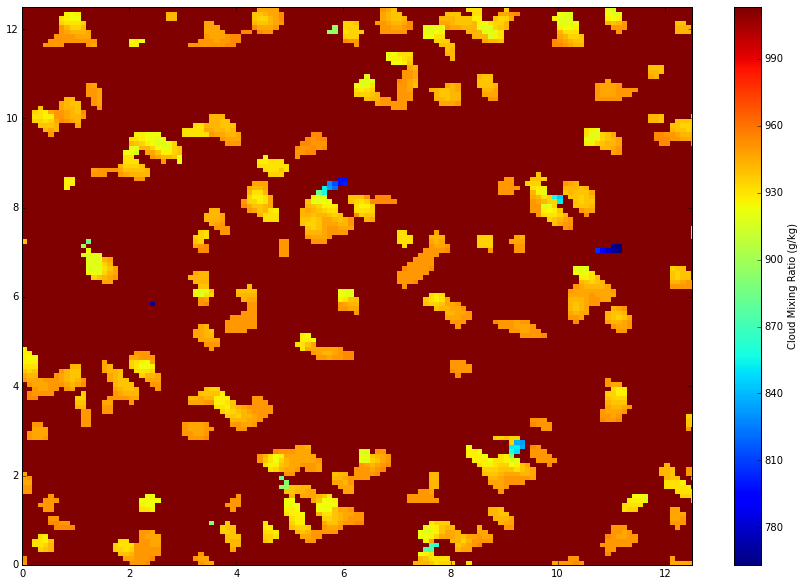

In [237]:
fig = plt.figure(figsize = [15,10])
print(cloud_mixing_ratio.data.max(), cloud_mixing_ratio.data.min())
plt.pcolormesh(x_array/1000.0, y_array/1000.0, 
               cth)
cb = plt.colorbar()
plt.ylim([0, 12.5])
plt.xlim([0, 12.5])
cb.set_label('Cloud Mixing Ratio (g/kg)')


0.00085808 0.0


(1013, 650)

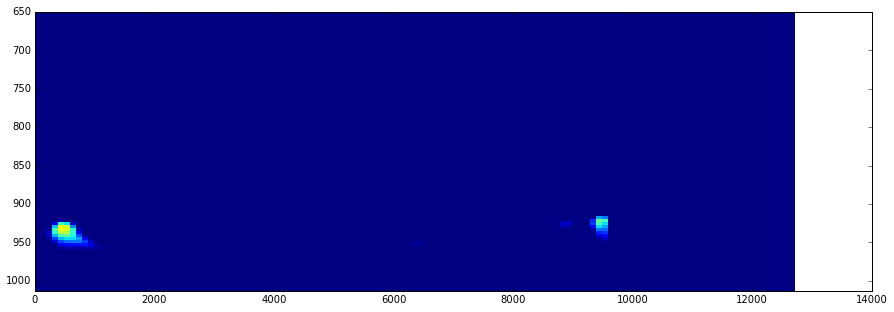

In [213]:
fig = plt.figure(figsize = [15,5])
print(cloud_mixing_ratio.data.max(), cloud_mixing_ratio.data.min())
plt.pcolormesh(x_array, levels, cloud_mixing_ratio.data[5, :, 110,:], vmax = 0.000840357)
plt.ylim([1013, 650])

46.6031 0.0


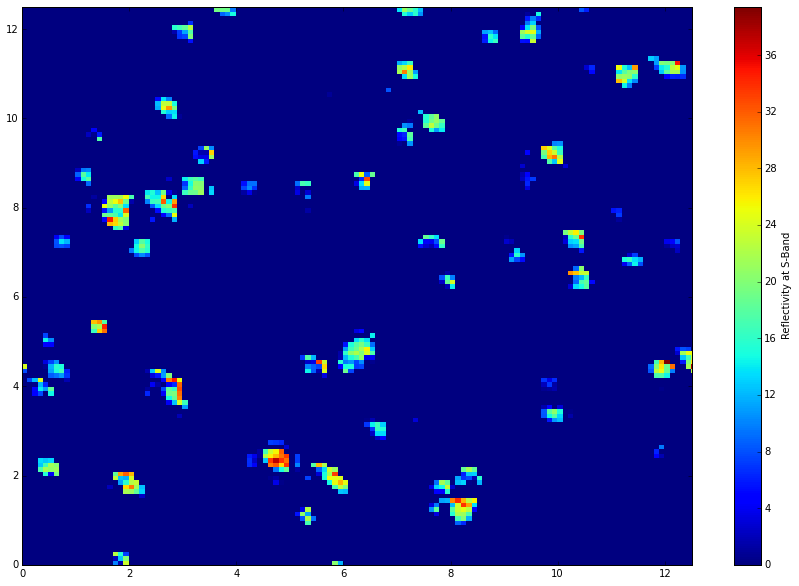

In [193]:
fig = plt.figure(figsize = [15,10])
print(refl.data.max(), refl.data.min())
plt.pcolormesh(x_array/1000.0, y_array/1000.0, 
               refl.data[5, 20, :,:])
cb = plt.colorbar()
plt.ylim([0, 12.5])
plt.xlim([0, 12.5])
cb.set_label('Reflectivity at S-Band')


1.65176e+09 0.0   kg(-1)


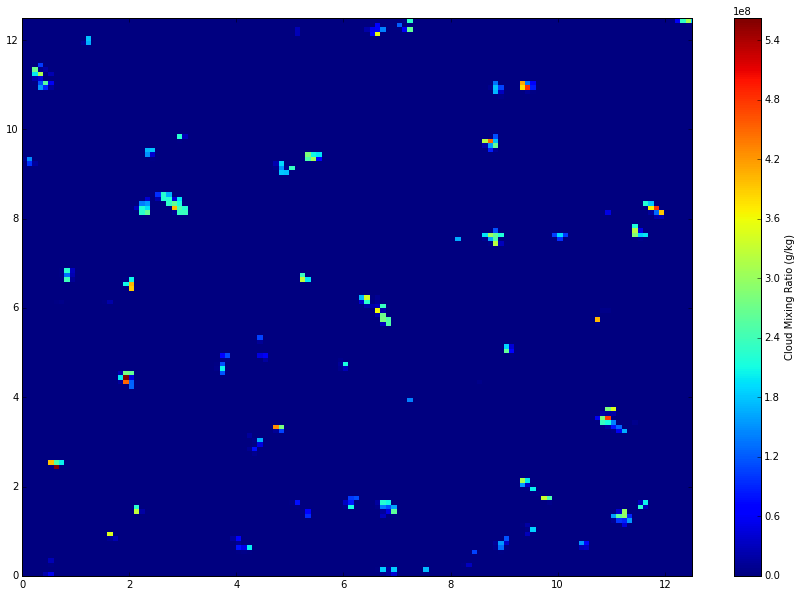

In [203]:
fig = plt.figure(figsize = [15,10])
print(cloud_ndensity.data.max(), cloud_ndensity.data.min(), cloud_ndensity.units)
plt.pcolormesh(x_array/1000.0, y_array/1000.0, cloud_ndensity.data[5, 20, :,:])
cb = plt.colorbar()
plt.ylim([0, 12.5])
plt.xlim([0, 12.5])
cb.set_label('Cloud Mixing Ratio (g/kg)')


In [49]:
for key in my_data.keys():
    try:
        print(key, " : ", my_data[key].description)
    except:
        print(key, ' does not have')

Times  does not have
XLAT  :  LATITUDE, SOUTH IS NEGATIVE
XLONG  :  LONGITUDE, WEST IS NEGATIVE
LU_INDEX  :  LAND USE CATEGORY
ZNU  :  eta values on half (mass) levels
ZNW  :  eta values on full (w) levels
ZS  :  DEPTHS OF CENTERS OF SOIL LAYERS
DZS  :  THICKNESSES OF SOIL LAYERS
VAR_SSO  :  variance of subgrid-scale orography
LAP_HGT  :  Laplacian of orography
U  :  x-wind component
V  :  y-wind component
W  :  z-wind component
PH  :  perturbation geopotential
PHB  :  base-state geopotential
T  :  perturbation potential temperature (theta-t0)
HFX_FORCE  :  SCM ideal surface sensible heat flux
LH_FORCE  :  SCM ideal surface latent heat flux
TSK_FORCE  :  SCM ideal surface skin temperature
HFX_FORCE_TEND  :  SCM ideal surface sensible heat flux tendency
LH_FORCE_TEND  :  SCM ideal surface latent heat flux tendency
TSK_FORCE_TEND  :  SCM ideal surface skin temperature tendency
MU  :  perturbation dry air mass in column
MUB  :  base state dry air mass in column
NEST_POS  :  -
TKE  :  TURB

In [231]:
print(levels.shape)

(99,)


In [233]:
print(cloud_mixing_ratio.data[5, :, :,:].argmax(axis=0).shape)

(128, 128)


In [234]:
np.choose?